# Hands-on Activity 9.2 Customized Visualizations using Seaborn

### Procedures:

*   9.4 Introduction to Seaborn
*   9.5 Formatting Plots
*   9.6 Customizing Visualizations

### Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.
2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)
3. Fill in the area between the bounds in the plot from exercise #2.
4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.
5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
  - Disappointing user growth announced after close on July 25, 2018
  - Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
  - FTC launches investigation on March 20, 2018
6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('data/earthquakes-1.csv')

Text(0.5, 1.0, 'Correlation Heatmap: Magnitude vs Tsunami with magType of mb')

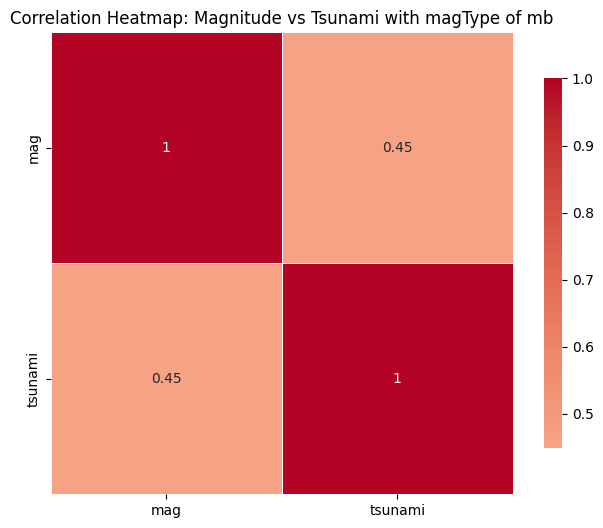

In [2]:
# 1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

fig, ax = plt.subplots(figsize=(8, 6))

mb_quakes = quakes[quakes['magType'] == 'mb'] # filter data with magType == mb
corr_coefficient = mb_quakes[['mag', 'tsunami']].corr() # correlation coefficient

sns.heatmap(
    corr_coefficient,
    annot=True, # show the correlation coefficient
    cmap='coolwarm', # colormap
    center=0, # center at 0
    square=True,
    linewidth=0.5,
    cbar_kws={'shrink': 0.8}, # size of the colorbar
    ax=ax
)

ax.set_title('Correlation Heatmap: Magnitude vs Tsunami with magType of mb')

Text(0.5, 1.0, 'Box Plot of Facebook Closing Prices')

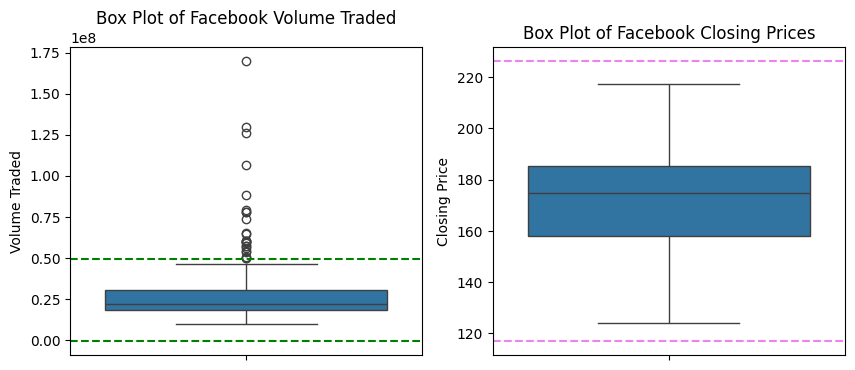

In [3]:
# 2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5.
# The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier.
# (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

# q1, q3, irq calculation for volume traded
Q1_vol = fb['volume'].quantile(0.25)
Q3_vol = fb['volume'].quantile(0.75)
IQR_vol = Q3_vol - Q1_vol

# q1, q3, irq calculation for closing prices
Q1_close = fb['close'].quantile(0.25)
Q3_close = fb['close'].quantile(0.75)
IQR_close = Q3_close - Q1_close

# tukey fence, bounds
lower_bound_vol = Q1_vol - 1.5 * IQR_vol
upper_bound_vol = Q3_vol + 1.5 * IQR_vol

lower_bound_close = Q1_close - 1.5 * IQR_close
upper_bound_close = Q3_close + 1.5 * IQR_close

# creating a subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# for volume traded
sns.boxplot(
    y='volume',
    data=fb[['volume']],
    ax=axes[0]
)

axes[0].axhline(y=lower_bound_vol, color='green', linestyle='--', label='Lower Bound')
axes[0].axhline(y=upper_bound_vol, color='green', linestyle='--', label='Upper Bound')
axes[0].set_ylabel('Volume Traded')
axes[0].set_title('Box Plot of Facebook Volume Traded')

# for closing prices
sns.boxplot(
    y='close',
    data=fb[['close']],
    ax=axes[1]
)

axes[1].axhline(y=lower_bound_close, color='violet', linestyle='--', label='Lower Bound')
axes[1].axhline(y=upper_bound_close, color='violet', linestyle='--', label='Upper Bound')
axes[1].set_ylabel('Closing Price')
axes[1].set_title('Box Plot of Facebook Closing Prices')

Text(0.5, 1.0, 'Box Plot of Facebook Closing Prices')

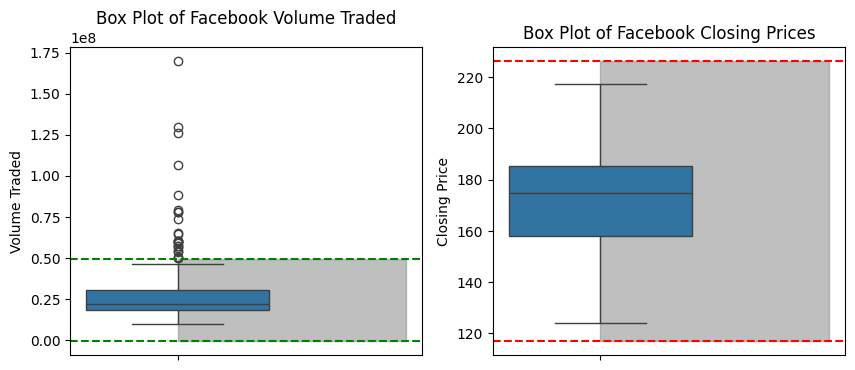

In [14]:
# 3. Fill in the area between the bounds in the plot from exercise #2.

# q1, q3, irq calculation for volume traded
Q1_vol = fb['volume'].quantile(0.25)
Q3_vol = fb['volume'].quantile(0.75)
IQR_vol = Q3_vol - Q1_vol

# q1, q3, irq calculation for closing prices
Q1_close = fb['close'].quantile(0.25)
Q3_close = fb['close'].quantile(0.75)
IQR_close = Q3_close - Q1_close

# tukey fence, bounds
lower_bound_vol = Q1_vol - 1.5 * IQR_vol
upper_bound_vol = Q3_vol + 1.5 * IQR_vol

lower_bound_close = Q1_close - 1.5 * IQR_close
upper_bound_close = Q3_close + 1.5 * IQR_close

# creating a subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# for volume traded
sns.boxplot(
    y='volume',
    data=fb[['volume']],
    ax=axes[0]
)

axes[0].axhline(y=lower_bound_vol, color='green', linestyle='--', label='Lower Bound')
axes[0].axhline(y=upper_bound_vol, color='green', linestyle='--', label='Upper Bound')
axes[0].fill_between([0, 1], lower_bound_vol, upper_bound_vol, color='gray', alpha=0.5) # to fill in the area between the bounds
axes[0].set_ylabel('Volume Traded')
axes[0].set_title('Box Plot of Facebook Volume Traded')

# for closing prices
sns.boxplot(
    y='close',
    data=fb[['close']],
    ax=axes[1]
)

axes[1].axhline(y=lower_bound_close, color='red', linestyle='--', label='Lower Bound')
axes[1].axhline(y=upper_bound_close, color='red', linestyle='--', label='Upper Bound')
axes[1].fill_between([0, 1], lower_bound_close, upper_bound_close, color='gray', alpha=0.5) # to fill in the area between the bounds
axes[1].set_ylabel('Closing Price')
axes[1].set_title('Box Plot of Facebook Closing Prices')

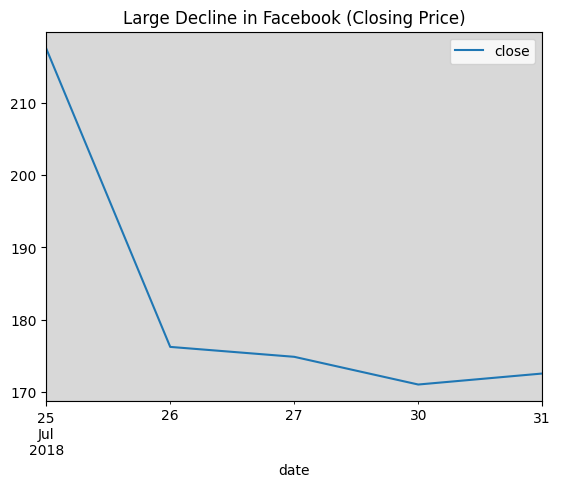

In [13]:
# 4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018- 07-31', which marks the large decline in Facebook price on a line plot of the closing price.
ax = fb['2018-07-25':'2018-07-31'][['close']].plot(kind='line', title='Large Decline in Facebook (Closing Price)')
ax.axvspan('2018-07-25', '2018-07-31', alpha=0.3, color='gray')

Text(0, 0.5, 'Closing Price')

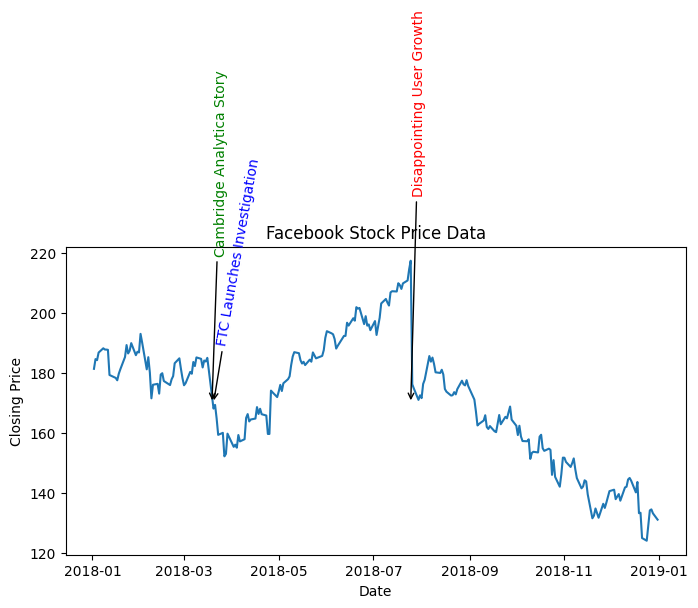

In [35]:
# 5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price
  # Disappointing user growth announced after close on July 25, 2018
  # Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
  # FTC launches investigation on March 20, 2018

from datetime import datetime

# creating the line plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=fb, x=fb.index, y='close')
plt.title('Facebook Stock Price Data')

# converting string to datetime
date_format = '%Y-%m-%d'
date1 = datetime.strptime('2018-07-25', date_format)
date2 = datetime.strptime('2018-07-26', date_format)
date3 = datetime.strptime('2018-03-19', date_format)
date4 = datetime.strptime('2018-03-20', date_format)
date5 = datetime.strptime('2018-03-21', date_format)

# annotating the 3 events
plt.annotate('Disappointing User Growth', xy=(date1, 170), xytext=(date2, 240),
             arrowprops=dict(facecolor='red', arrowstyle='->'), color='red', rotation=90)

plt.annotate('Cambridge Analytica Story', xy=(date3, 170), xytext=(date4, 220),
             arrowprops=dict(facecolor='green', arrowstyle='->'), color='green', rotation=90)

plt.annotate('FTC Launches Investigation', xy=(date4, 170), xytext=(date5, 190),
             arrowprops=dict(facecolor='blue', arrowstyle='->'), color='blue', rotation=80)

plt.xlabel('Date')
plt.ylabel('Closing Price')

In [39]:
# 6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors.
# Remember, for this use case, we should pick a qualitative colormap or make our own.

# modified
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps # list of registered colormaps
import random

def reg_resid_plots(data):
    """
    Using seaborn, plot the regression and residuals
    plots side-by-side for every permutation of 2 columns
    in the data.

    Parameters:
        - data: A pandas DataFrame

    Returns:
        A matplotlib Figure object.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))

    # generate random numbers that will serve as the index in our colormap list
    rand_color = random.randint(0, len(colormaps))

    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2),
        ax,
        itertools.cycle([rand_color, rand_color])
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)
    plt.close()
    return fig

In [ ]:
# original code
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

def reg_resid_plots(data):
    """
    Using seaborn, plot the regression and residuals
    plots side-by-side for every permutation of 2 columns
    in the data.

    Parameters:
        - data: A pandas DataFrame

    Returns:
        A matplotlib Figure object.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))

    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2),
        ax,
        itertools.cycle(['royalblue', 'darkorange'])
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)
    plt.close()
    return fig

### Summary/Conclusion:


*   In conlusion, I learned how to utilized seaborn with a bit of confusion in doing so. I'm still having trouble understanding the visual representation of some data, heatmaps and boxplots for example, I definitely need some refresher about that. Still, I was able to do all the supplementary activity given though I'm not sure if what I did are the right answers. Seaborn was just another method to represent data just like matplot which sis the one I prefer but both of them have their strengths depending on how you want to represent your data. I definitely need more studying on these concepts becuase I still don't know everything it is capable of.


